<a href="https://colab.research.google.com/github/Shashank-Holla/CNN_for_CIFAR10/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [9]:
cd '/gdrive/My Drive/Colab Notebooks/SchoolOfAI/Session7_CIFAR/cnn_for_cifar10/'

/gdrive/My Drive/Colab Notebooks/SchoolOfAI/Session7_CIFAR/cnn_for_cifar10


In [0]:
ls

data/                    mainfile.py  models/       train.py
Execute.ipynb            main.ipynb   __pycache__/  transform.py
GraphsForLearning.ipynb  metrics.py   test.py


In [0]:
#import all necessary .py files
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary


from train import train
from test import test
from metrics import train_test_metrics_graph
from transform import transform
from models import *

In [11]:
#Check the number of parameters
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
#My model
#net = Net().to(device)
#Resnet18 model
net = ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

Files already downloaded and verified
Files already downloaded and verified
epoch: 0
[1,   300] loss: 0.166
epoch: 1
[2,   300] loss: 0.126
epoch: 2
[3,   300] loss: 0.101
epoch: 3
[4,   300] loss: 0.087
epoch: 4
[5,   300] loss: 0.078
epoch: 5
[6,   300] loss: 0.071
epoch: 6
[7,   300] loss: 0.066
epoch: 7
[8,   300] loss: 0.061
epoch: 8
[9,   300] loss: 0.056
epoch: 9
[10,   300] loss: 0.053
epoch: 10
[11,   300] loss: 0.051
epoch: 11
[12,   300] loss: 0.048
epoch: 12
[13,   300] loss: 0.046
epoch: 13
[14,   300] loss: 0.044
epoch: 14
[15,   300] loss: 0.042
Train Accuracy- [61.782, 71.592, 76.818, 80.05, 82.278, 83.83, 84.854, 86.06, 87.254, 87.768, 88.374, 88.836, 89.33, 89.642, 90.32]
Test Accuracy- [69.07, 74.11, 78.27, 79.17, 81.67, 83.43, 83.96, 84.68, 85.24, 85.84, 85.99, 86.2, 86.72, 87.19, 86.63]
Train loss- [1.0745094624849467, 0.814749427483632, 0.6643212478894454, 0.5792719738605695, 0.5189008062466597, 0.4701617608467738, 0.4389640753849959, 0.4044495952435029, 0.3741781

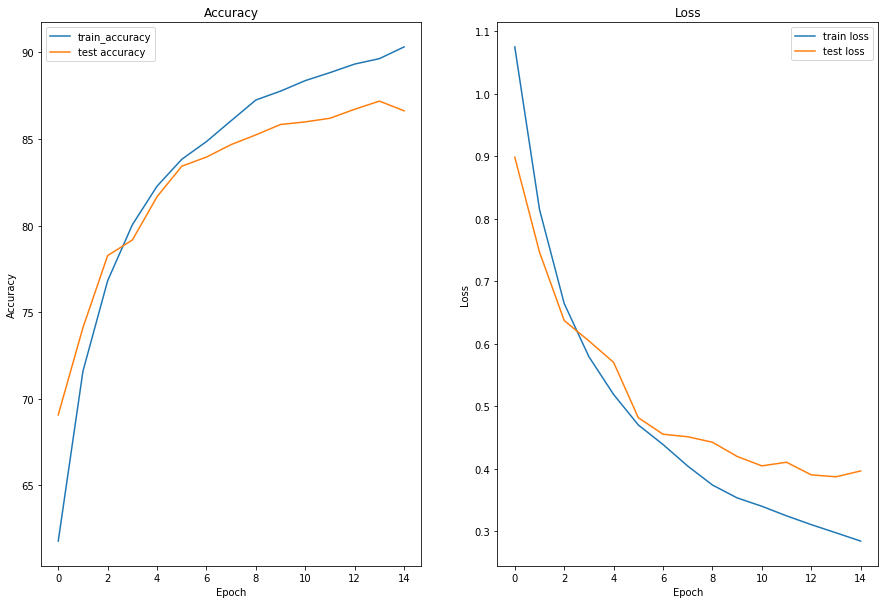

In [13]:
EPOCHS =15
train_accuracy = []
test_accuracy = []
train_loss = []
test_loss = []
from torch.optim.lr_scheduler import StepLR 

#import CIFAR10 data. Perform Normalize, Batching through transforms.
trainloader, testloader, classes = transform()

criterion = nn.CrossEntropyLoss()
# Optimum LR for custom_model = 0.015
optimizer = optim.SGD(net.parameters(), lr=0.02, momentum=0.9, weight_decay=0.001)
# scheduler = StepLR(optimizer, step_size=3, gamma=0.001)


for epoch in range(EPOCHS):
  print("epoch:", epoch)
  train_accuracy_delta, train_loss_delta = train(net, device, trainloader, optimizer, criterion, epoch)
  test_accuracy_delta, test_loss_delta = test(net, device, testloader, criterion)
  # scheduler.step()
  train_accuracy.append(train_accuracy_delta)
  train_loss.append(train_loss_delta)
  test_accuracy.append(test_accuracy_delta)
  test_loss.append(test_loss_delta)
  
print("Train Accuracy-",train_accuracy)
print("Test Accuracy-",test_accuracy)

print("Train loss-",train_loss)
print("Test loss-",test_loss)
train_test_metrics_graph(train_accuracy, train_loss, test_accuracy, test_loss)

In [0]:
# CHeck the contents of the .py file.
# %pycat metrics.py